In [328]:
from utils import compute_band_powers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

In [329]:
#Since the data is recorded using muse-lsl, rescaling is not required

filename = "highway_hazards_EEG_recording_2021-09-27-13.37.20.csv"
df = pd.read_csv(filename)

muse_data_subset = df 
muse_data_subset.index = pd.to_datetime(muse_data_subset.timestamps.astype('datetime64[s]'))
muse_data_subset = muse_data_subset.resample("4ms").mean().bfill()
muse_data_subset["timestamps"] = pd.to_datetime(muse_data_subset.index, unit='s')
muse_data_subset["timestamps"] = pd.to_datetime(muse_data_subset["timestamps"], unit='s').apply(lambda x: x.timestamp())
muse_data_subset = muse_data_subset[["timestamps", "TP9", "AF7", "AF8", "TP10", "Right AUX"]]
    

In [330]:
x = muse_data_subset[["TP9", "AF7", "AF8", "TP10"]].to_numpy()

In [331]:
data = x
data = 0.48828125 * (np.array(data))
muse_data = 1680 * ((data) - data.min()) / (data.max() - data.min())

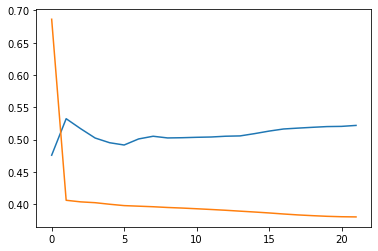

In [332]:
a_b_tp9_s = []
a_b_tp10_s = []

for i in range(int(muse_data.shape[0]/250)): 
    band_powers = compute_band_powers(muse_data[i:250*(i+1)],fs=250)
    
    for index,electrode in enumerate(["TP9", "AF7", "AF8", "TP10"]):
        band_power = band_powers[index:index+4]
        band_power += band_power[0]
        if electrode in ["TP9"]:
            a_b_tp9 = (band_power[2]+band_power[3])/band_power.sum()
            a_b_tp9_s.append(a_b_tp9)
            
        if electrode in ["TP10"]:
            a_b_tp10 = (band_power[2]+band_power[3])/band_power.sum()
            a_b_tp10_s.append(a_b_tp10)
            
            
            
plt.plot(a_b_tp9_s)
plt.plot(a_b_tp10_s)
plt.show()